In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [7]:
# 1. Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
df = pd.read_csv(url)

In [8]:
# 2. Eksplorasi data awal
print("Dimensi dataset:", df.shape)
print("\nInformasi dataset:")
df.info()
print("\nStatistik deskriptif:")
print(df.describe())

Dimensi dataset: (1020, 34)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  

In [9]:
# 3. Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


In [23]:
# 4. Pisahkan kolom numerik dan kategorik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = ['Gender', 'Age', 'Ethnicity']

In [24]:
# 5. Imputasi nilai yang hilang pada kolom numerik
print("\nMelakukan imputasi untuk nilai yang hilang...")
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])


Melakukan imputasi untuk nilai yang hilang...


In [25]:
# 6. Encoding kolom kategorikal menggunakan One-Hot Encoding
print("Melakukan one-hot encoding untuk kolom kategorikal...")
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

Melakukan one-hot encoding untuk kolom kategorikal...


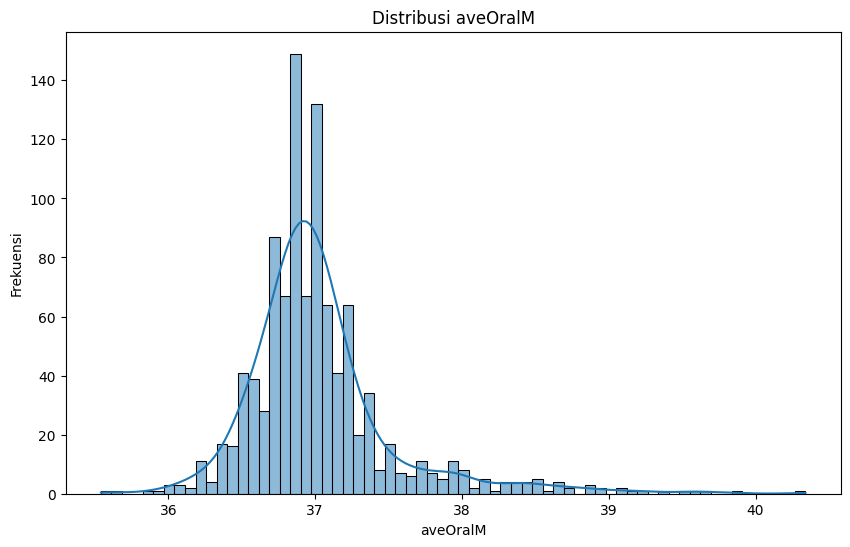

In [26]:
# 7. Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['aveOralM'], kde=True)
plt.title('Distribusi aveOralM')
plt.xlabel('aveOralM')
plt.ylabel('Frekuensi')
plt.show()

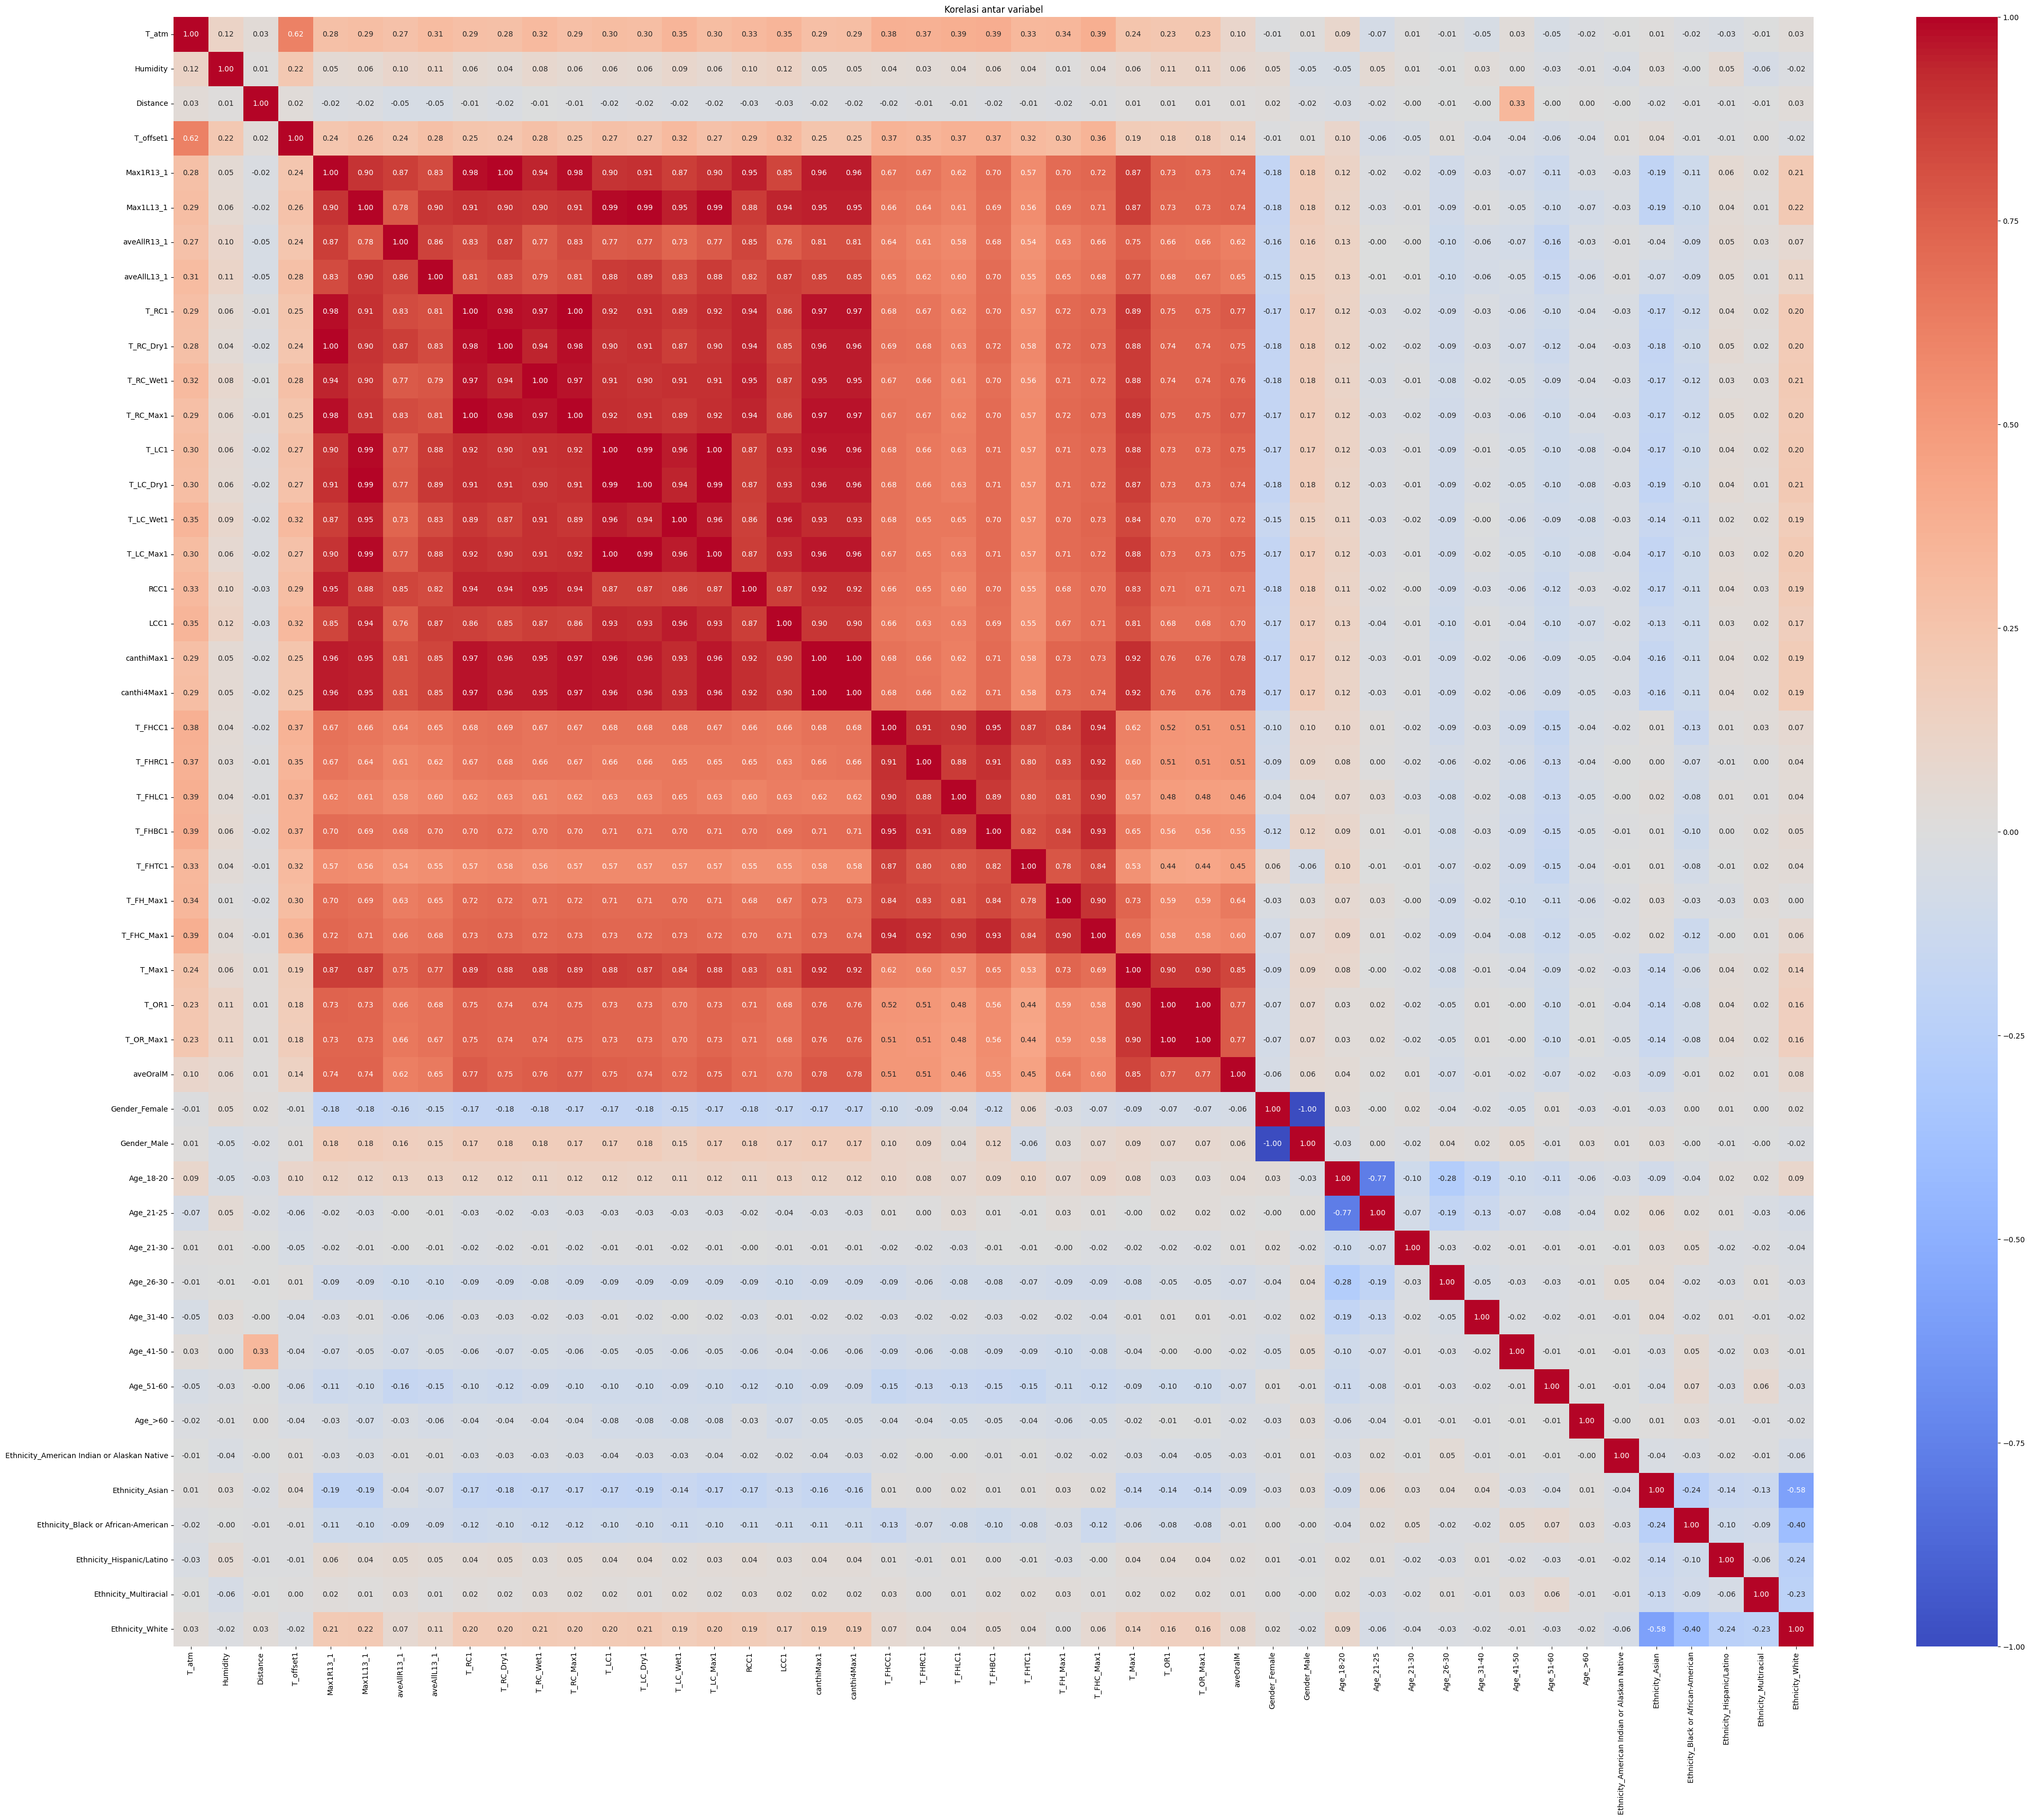

In [ ]:
# 8. Visualisasi korelasi
plt.figure(figsize=(50, 40))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar variabel')
plt.show()

In [33]:
# 9. Cek korelasi dengan target
print("\nKorelasi dengan aveOralM:")
print(corr['aveOralM'].sort_values(ascending=False))


Korelasi dengan aveOralM:
aveOralM                                       1.000000
T_Max1                                         0.849657
canthiMax1                                     0.784096
canthi4Max1                                    0.783763
T_RC_Max1                                      0.769463
T_RC1                                          0.768730
T_OR1                                          0.767345
T_OR_Max1                                      0.766911
T_RC_Wet1                                      0.760134
T_LC_Max1                                      0.750527
T_LC1                                          0.750390
T_RC_Dry1                                      0.748566
T_LC_Dry1                                      0.743656
Max1R13_1                                      0.741902
Max1L13_1                                      0.735644
T_LC_Wet1                                      0.720383
RCC1                                           0.714193
LCC1                 

In [40]:
# 7. Persiapkan data untuk pemodelan
# Pisahkan fitur dan target
X = df_encoded.drop('aveOralM', axis=1)
y = df_encoded['aveOralM']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nJumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])


Jumlah data training: 816
Jumlah data testing: 204


In [41]:
# 8. Buat pipeline dengan standardisasi dan KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [42]:
# 9. Cari nilai K terbaik dengan GridSearchCV
param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # p=1 untuk Manhattan, p=2 untuk Euclidean
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nParameter terbaik:", grid_search.best_params_)
print("MSE terbaik:", -grid_search.best_score_)


Parameter terbaik: {'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'}
MSE terbaik: 0.08016917027685669


In [43]:
# 10. Evaluasi model pada data testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nPerforma model pada data testing:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Performa model pada data testing:
Mean Squared Error (MSE): 0.0699
Root Mean Squared Error (RMSE): 0.2644
R-squared (R²): 0.6680


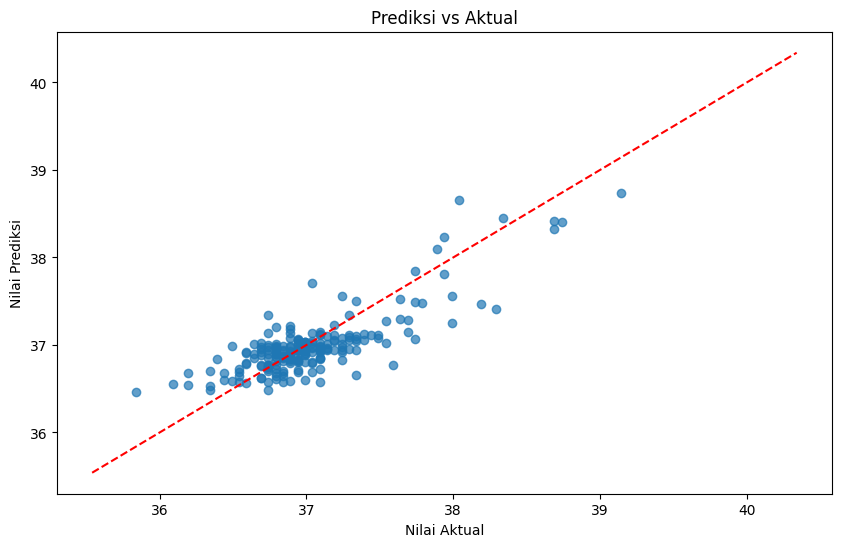

In [44]:
# 11. Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual')
plt.show()

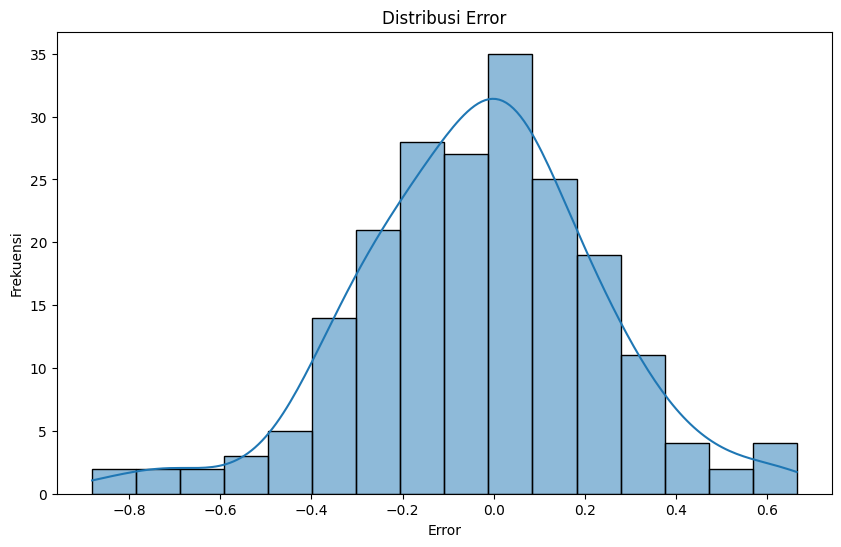

In [45]:
# 12. Visualisasi error
plt.figure(figsize=(10, 6))
error = y_pred - y_test
sns.histplot(error, kde=True)
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.show()


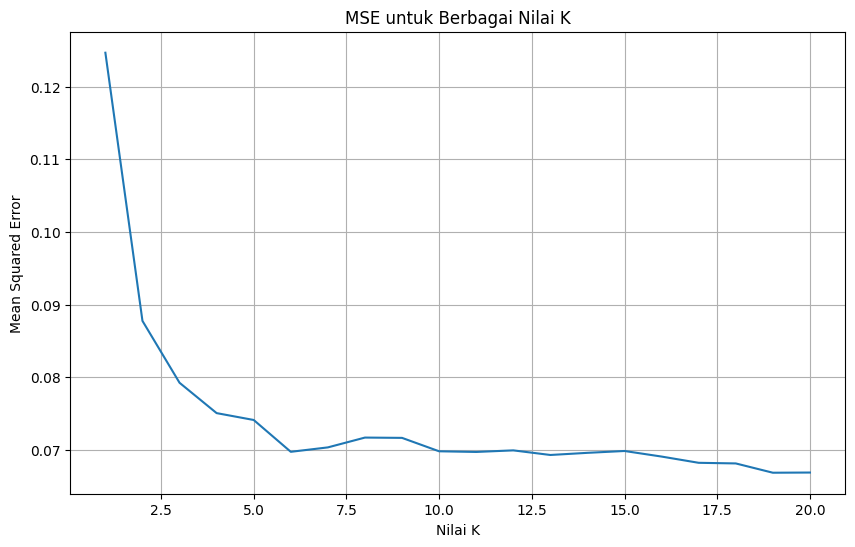

In [46]:
# 13. Visualisasi performa model dengan berbagai nilai K
k_range = range(1, 21)
k_scores = []

for k in k_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Nilai K')
plt.ylabel('Mean Squared Error')
plt.title('MSE untuk Berbagai Nilai K')
plt.grid(True)
plt.show()

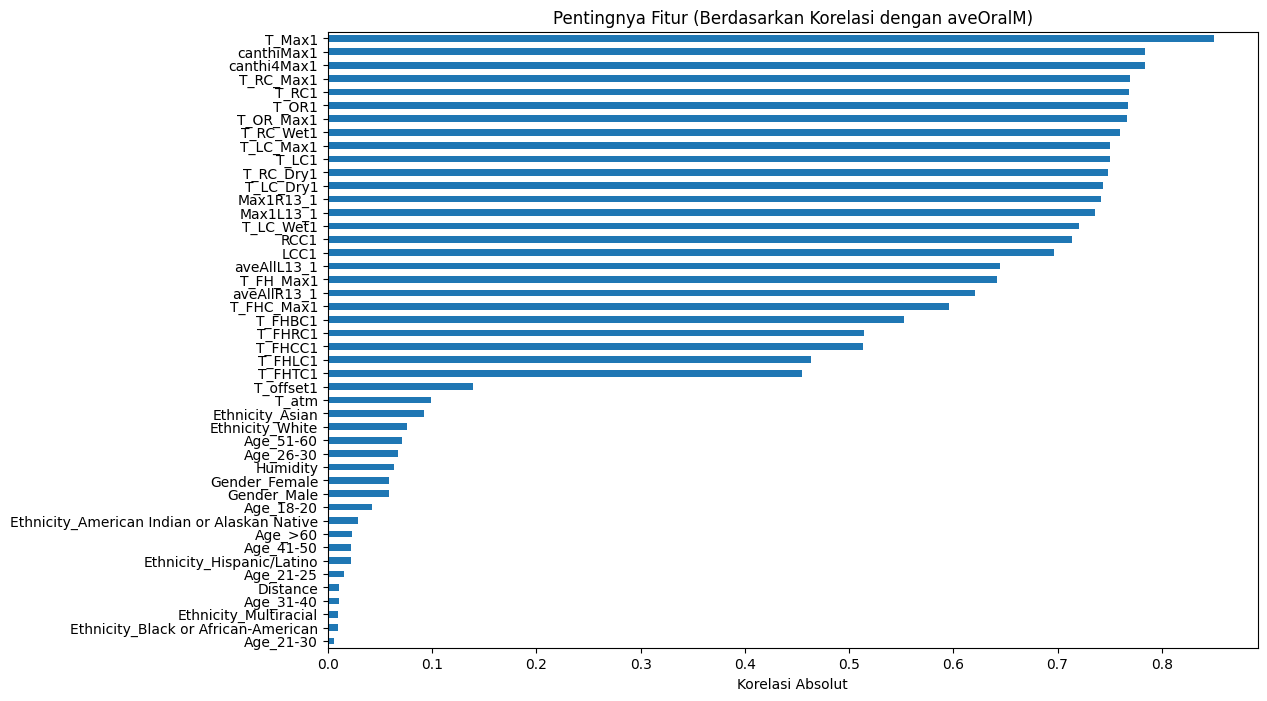

In [47]:
# 14. Tampilkan fitur yang paling berpengaruh (based on correlation)
importance = abs(corr['aveOralM'].drop('aveOralM'))
plt.figure(figsize=(12, 8))
importance.sort_values().plot(kind='barh')
plt.title('Pentingnya Fitur (Berdasarkan Korelasi dengan aveOralM)')
plt.xlabel('Korelasi Absolut')
plt.show()


## Mean Squared Error (MSE)
Mean Squared Error (MSE) adalah metrik yang digunakan untuk mengukur rata-rata kuadrat dari selisih antara nilai sebenarnya (y_true) dan nilai prediksi (y_pred). Rumus MSE:

\[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

Semakin kecil nilai MSE, semakin baik model dalam memprediksi nilai yang benar.



## Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. Rumusnya adalah:

\[ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]

RMSE memiliki satuan yang sama dengan data asli, sehingga lebih mudah untuk diinterpretasikan dibandingkan MSE.



## R-squared (R²)
R-squared (R²) adalah metrik yang digunakan untuk mengukur seberapa baik model menjelaskan variasi dalam data. Rumusnya:

\[ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \]

Di mana:
- \( SS_{res} = \sum (y_i - \hat{y}_i)^2 \) adalah jumlah kuadrat residual (error).
- \( SS_{tot} = \sum (y_i - \bar{y})^2 \) adalah jumlah kuadrat total.

Nilai R² berkisar antara 0 hingga 1. Semakin mendekati 1, semakin baik model dalam menjelaskan variasi data.